In [1]:
import pandas as pd 
import os 

In [2]:
carpeta1="MesJunio"
carpeta2="MesJulio"
carpeta3="MesAgosto"

In [3]:
def listar_archivos_csv(carpeta):
    return [os.path.join(carpeta,archivo) for archivo 
            in os.listdir(carpeta) if 
            archivo.endswith('.csv')]

In [4]:
archivos_carpeta1=listar_archivos_csv(carpeta1)
archivos_carpeta2=listar_archivos_csv(carpeta2)
archivos_carperta3=listar_archivos_csv(carpeta3)

In [5]:
archivos_csv=archivos_carpeta1+archivos_carpeta2+archivos_carperta3

In [6]:
dataframes=[pd.read_csv(archivo) for archivo in archivos_csv]

In [7]:
df_conbinado=pd.concat(dataframes,ignore_index=True)

In [8]:
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))"
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918


In [9]:
df_conbinado['Mb_dl']=df_conbinado['l_thrp_bits_dl']/1000000
df_conbinado['Mb_ul']=df_conbinado['l_thrp_bits_ul']/1000000
df_conbinado['totalMb']=df_conbinado['Mb_dl']+df_conbinado['Mb_ul']
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [10]:
df_conbinado.shape

(119548464, 13)

In [11]:
df_fecha=df_conbinado.groupby('fecha').agg({'totalMb':'sum'}).reset_index()

In [12]:
df_fecha.head()

,fecha,totalMb
0,2024-06-01,2.378064e+10
1,2024-06-02,2.344779e+10
2,2024-06-03,2.351177e+10
3,2024-06-04,2.359690e+10
4,2024-06-05,2.368501e+10


In [13]:
df_fecha['fecha'] = pd.to_datetime(df_fecha['fecha'])
print(df_fecha.dtypes)

fecha      datetime64[ns]
totalMb           float64
dtype: object


In [15]:
df_fecha.set_index('fecha', inplace=True)

In [16]:
import matplotlib.pyplot as plt
import plotly.express as px
import matplotlib.pyplot as plt 
import seaborn as sns

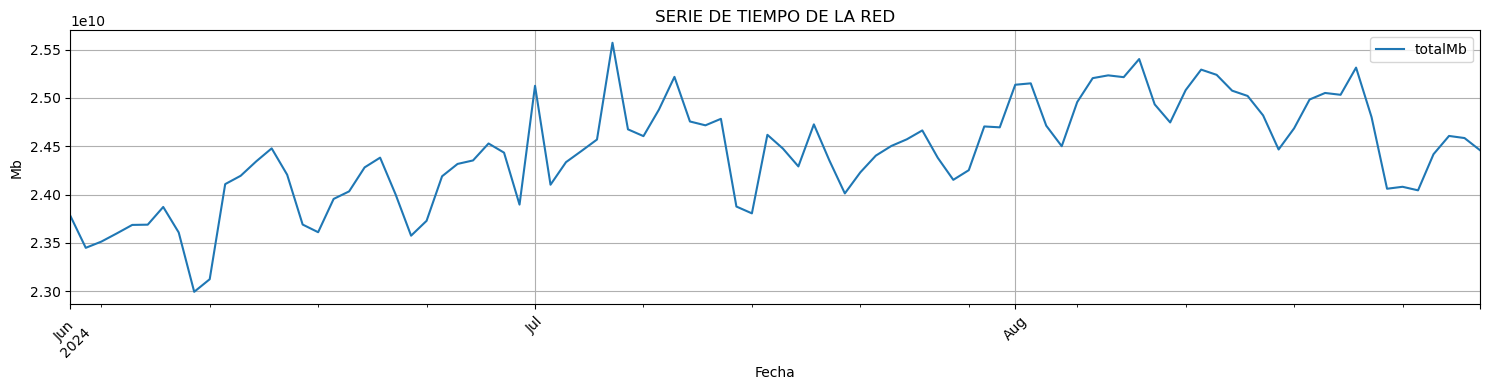

In [18]:
fix,ax=plt.subplots(figsize=(15,4))
df_fecha.plot(ax=ax)
plt.title('SERIE DE TIEMPO DE LA RED')
plt.xlabel('Fecha')
plt.ylabel('Mb')
# Rotar etiquetas del eje X (fechas) para mejor legibilidad
plt.xticks(rotation=45)
# Mostrar la cuadrícula para facilitar la lectura
#plt.grid(True)
# Ajustar márgenes y mostrar la gráfica
plt.grid()
plt.tight_layout()
plt.show()

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [20]:
escompose=seasonal_decompose(df_fecha,model="aditive")

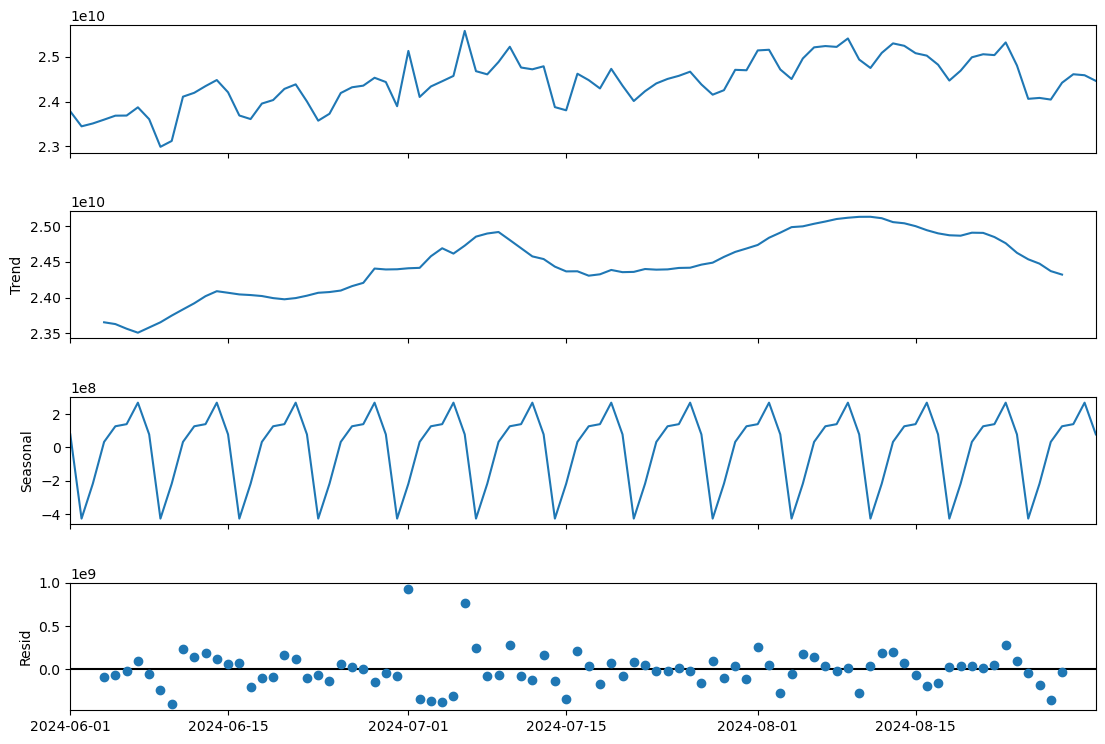

In [22]:
fig=escompose.plot()
fig.set_size_inches((12,8))

In [23]:
import numpy as np 
import statsmodels as sm 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [24]:
def stationarity_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test; ")
    df_test=adfuller(timeseries,autolag="AIC")
    df_output=pd.Series(df_test[0:4],index=["Test statistic","p-value","Number of lags used","Number of observations used"])

    print(df_output)

In [25]:
stationarity_test(df_fecha['totalMb'])

Results of Dickey-Fuller Test; 
Test statistic                 -2.094051
p-value                         0.246914
Number of lags used             7.000000
Number of observations used    84.000000
dtype: float64


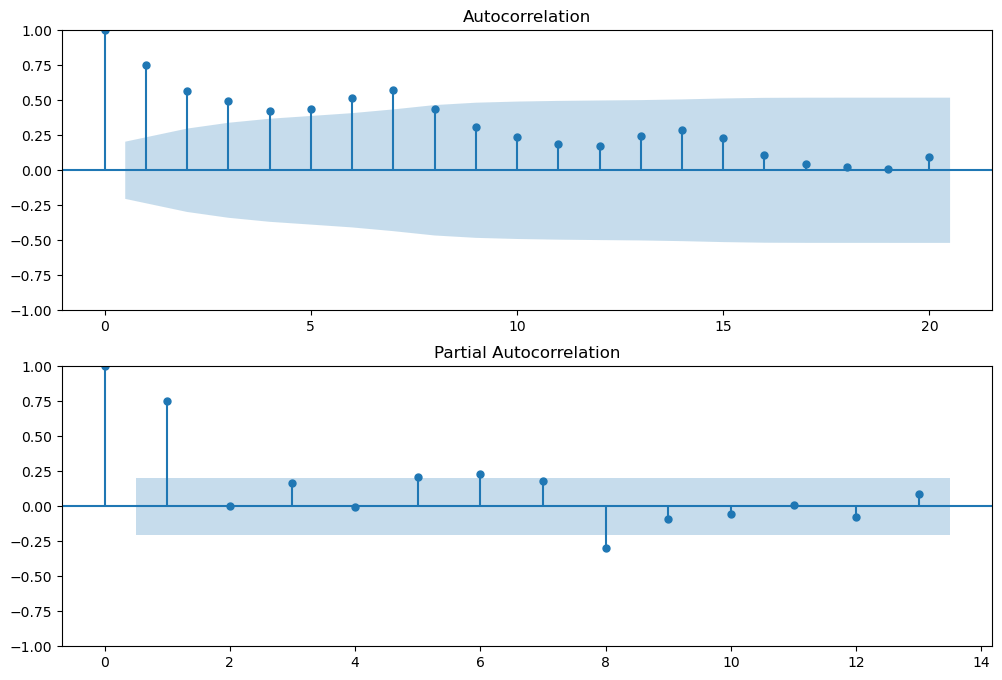

In [26]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df_fecha,lags=20,ax=ax1)#informa los retrasos de q
ax2=fig.add_subplot(212)
fig=plot_pacf(df_fecha,lags=13,ax=ax2)#informa los parametros de p

In [27]:
import warnings 
warnings.filterwarnings('ignore')

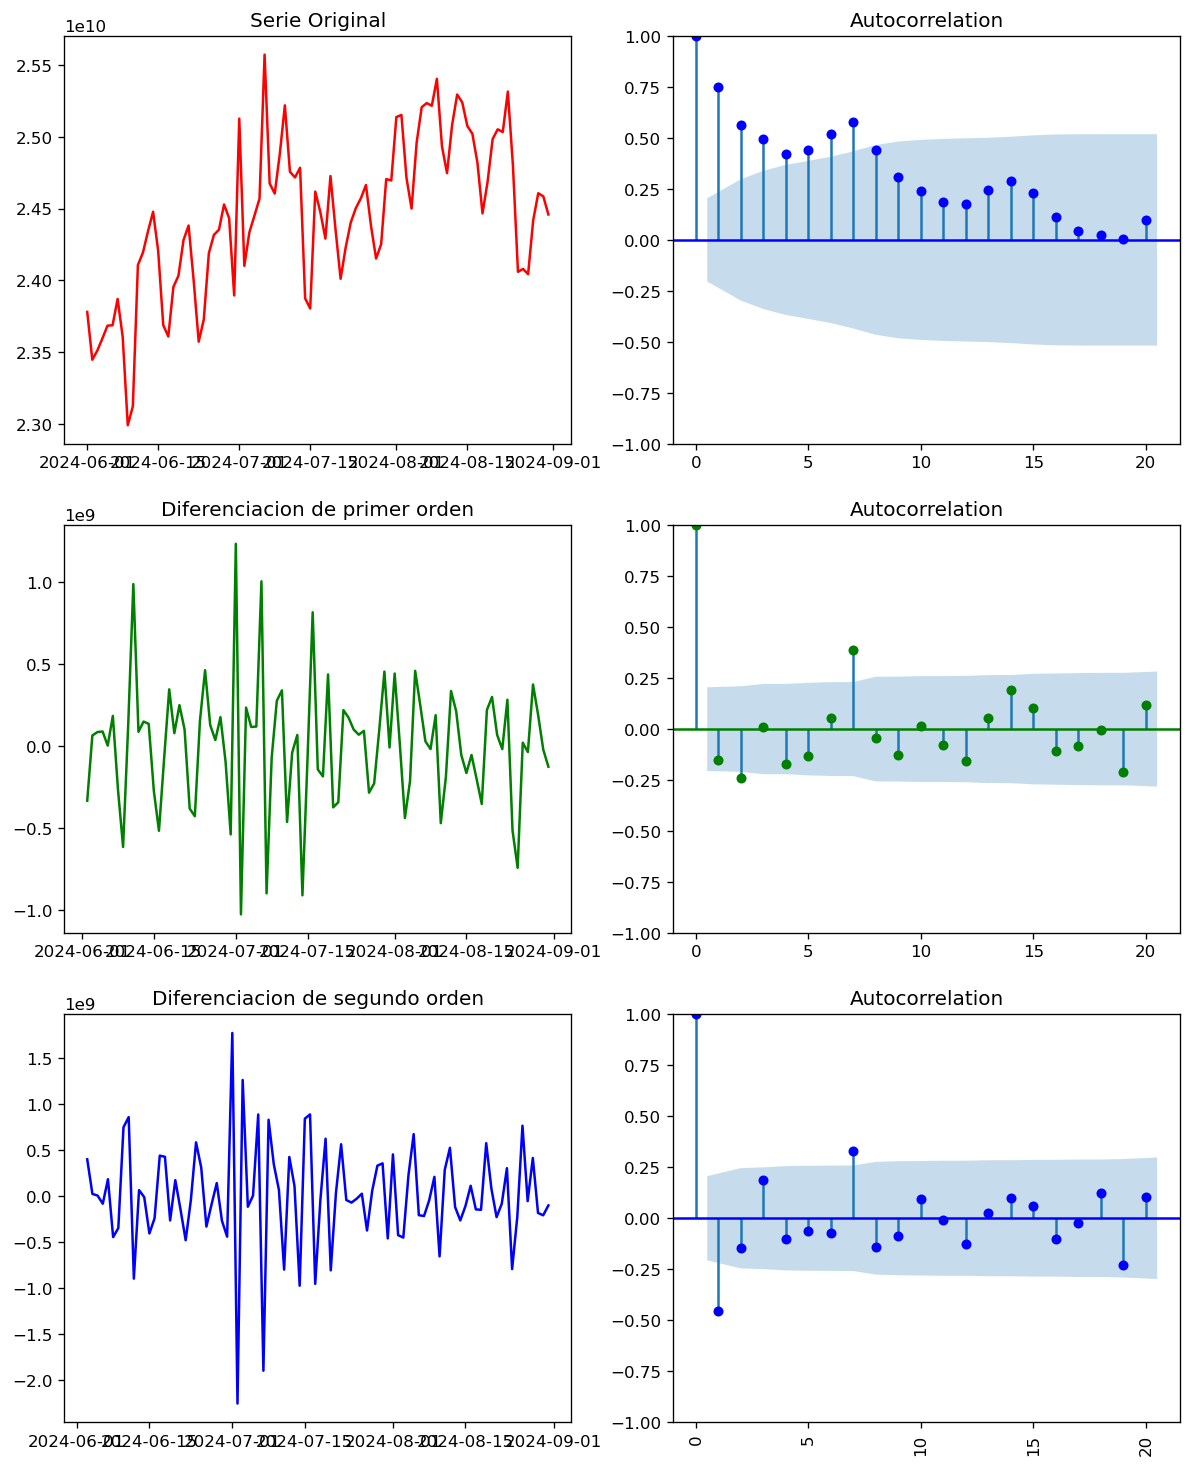

In [28]:
plt.rcParams.update({'figure.figsize':(12,15),'figure.dpi':(120)})
#Serie original
fig,axes=plt.subplots(3,2,sharex=False)
axes[0,0].plot(df_fecha.totalMb,color="r");axes[0,0].set_title('Serie Original')
plot_acf(df_fecha.totalMb,ax=axes[0,1],color="blue")
#plt.xticks(rotation=90)

#primera diferenciacion 
axes[1,0].plot(df_fecha.totalMb.diff(),color="g");axes[1,0].set_title('Diferenciacion de primer orden')
plot_acf(df_fecha.totalMb.diff().dropna(),ax=axes[1,1],color="g")

#segunda diferenciacion 
axes[2,0].plot(df_fecha.totalMb.diff().diff(),color="b");axes[2,0].set_title('Diferenciacion de segundo orden')
plot_acf(df_fecha.totalMb.diff().diff().dropna(),ax=axes[2,1],color="b")
plt.xticks(rotation=90)
plt.show()

In [30]:
df_dif=df_fecha['totalMb'].diff().dropna()
df_dif.head()

fecha
2024-06-02   -3.328581e+08
2024-06-03    6.398506e+07
2024-06-04    8.513152e+07
2024-06-05    8.810841e+07
2024-06-06    2.606173e+06
Name: totalMb, dtype: float64

In [31]:
stationarity_test(df_dif)

Results of Dickey-Fuller Test; 
Test statistic                 -4.349074
p-value                         0.000365
Number of lags used             6.000000
Number of observations used    84.000000
dtype: float64


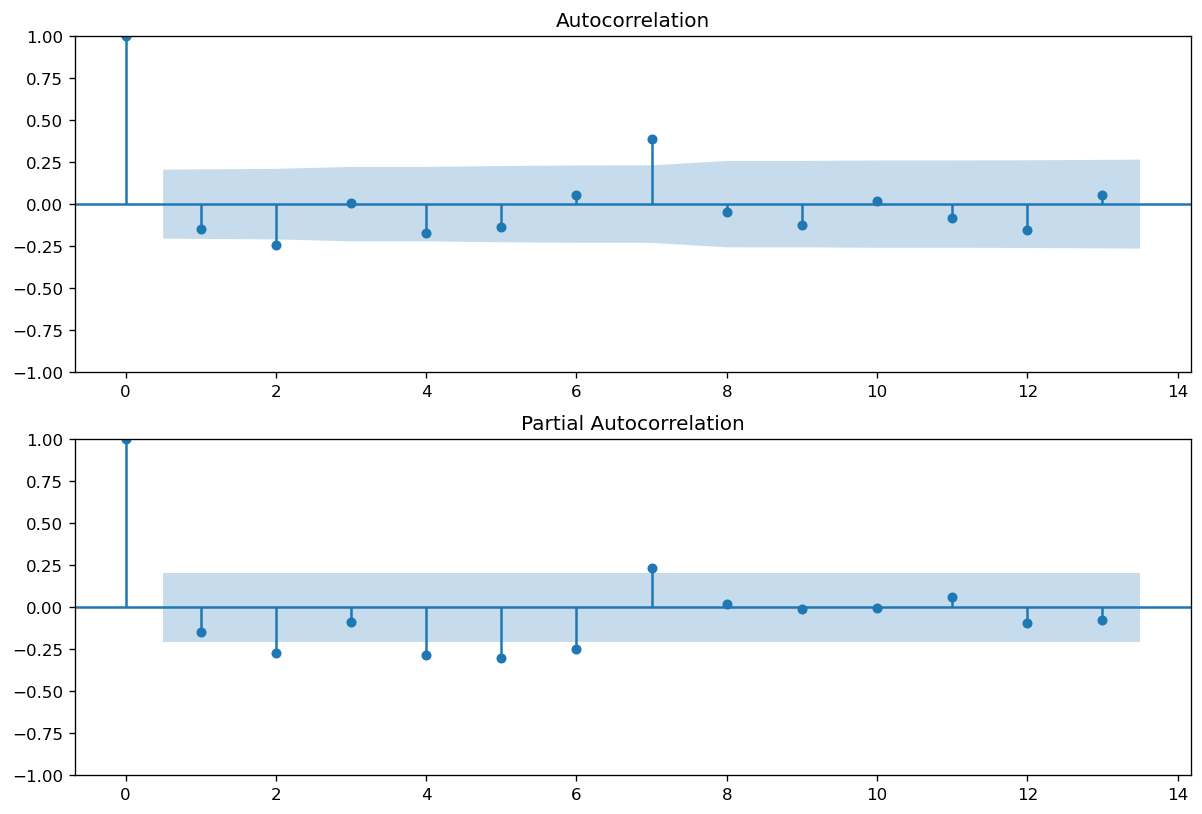

In [32]:
#paso 2 especificando asi el orden de retraos autorregresivos 
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df_dif,lags=13,ax=ax1)#informa los retrasos de q
ax2=fig.add_subplot(212)
fig=plot_pacf(df_dif,lags=13,ax=ax2)#informa los parametros de p

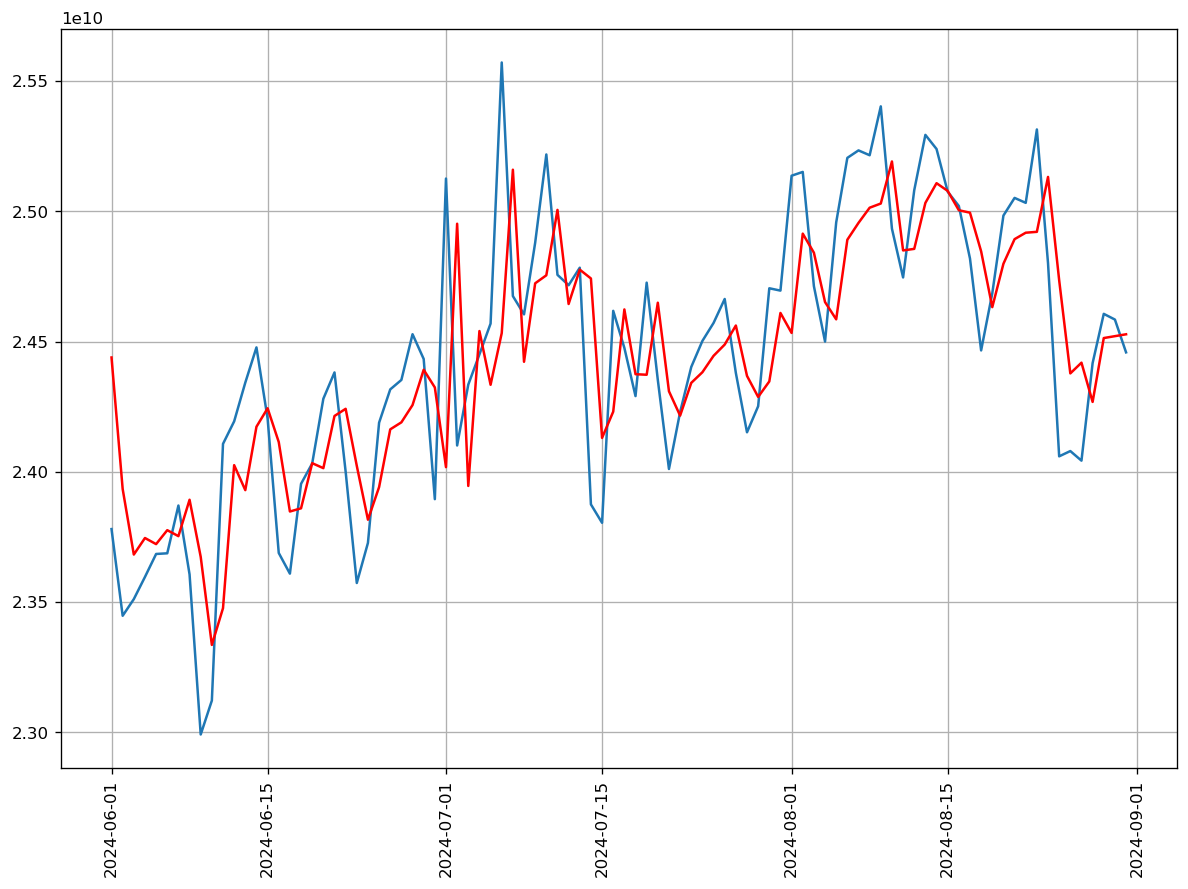

In [34]:
#La grafica de PACF tiene dos valores significativos ( P - D - Q)
model=ARIMA(df_fecha, order=(1,0,2))
results_AR2=model.fit()
plt.figure(figsize=(12,8))
plt.plot(df_fecha)
plt.plot(results_AR2.fittedvalues, color="red")
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [ ]:
pro=pd.Series(df_fecha['totalMb'].values,
                  index=pd.DatetimeIndex(
                      data=(tuple(pd.date_range('06/01/2024',
                                                         periods=30,
                                                        freq='D'))),
                                                         freq='D'))

In [36]:
Bim=pd.Series(df_fecha['totalMb'].values,
                  index=pd.DatetimeIndex(
                      data=(tuple(pd.date_range('06/01/2024',
                                                         periods=92,
                                                        freq='D'))),
                                                         freq='D'))

In [42]:
#P R O N O S T I C O 
model1202=ARIMA(df_fecha, order=(0,1,0))
results_M202=model1202.fit()
fcast202=results_M202.predict(star='2024/06/01',end='2024/09/10')

In [35]:
import pmdarima as pm 

In [41]:
mySA=pm.auto_arima(df_fecha,error_action="ignore",suppress_warnings=True,#Desactiva advertencias 
                   seasonal=True,d=1,start_q=1,start_p=1,#Conjunto de datos estacionales 12 observaciones por perido
                   start_Q=0,start_P=0,max_order=5,max_d=1,#Puntos de inicio 
                   max_D=1,D=1,stepwise=False,trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=3856.708, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=3857.459, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=3861.338, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=3862.754, Time=0.05 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=3864.426, Time=0.09 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=3865.942, Time=0.12 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=3857.468, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=3859.450, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=3863.561, Time=0.21 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=3864.375, Time=0.25 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=3866.419, Time=0.44 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=3859.656, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=3861.627, Time=0.06 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.51 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(3,1,0)(0,0,0)

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [67]:
df_fecha3=pd.read_csv('Trimestre.csv')
df_fecha3.head()

,fecha,totalMb
0,2024-06-01,2.378064e+10
1,2024-06-02,2.344779e+10
2,2024-06-03,2.351177e+10
3,2024-06-04,2.359690e+10
4,2024-06-05,2.368501e+10


In [68]:
df_fecha3['fecha'] = pd.to_datetime(df_fecha3['fecha'])
print(df_fecha3.dtypes)

fecha      datetime64[ns]
totalMb           float64
dtype: object


In [69]:
df_fecha3.dtypes

fecha      datetime64[ns]
totalMb           float64
dtype: object

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


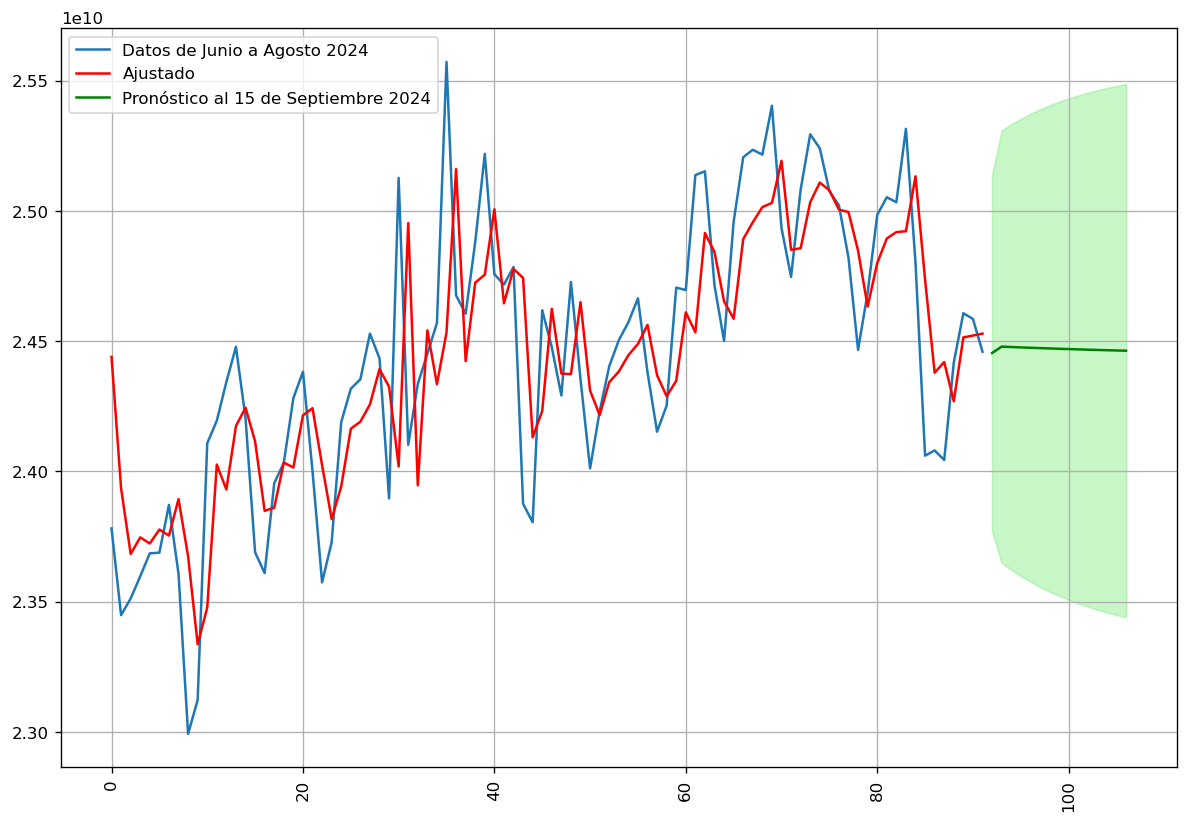

Mean Squared Error: 1.1807942136934525e+17


In [71]:

# Filtrar los datos entre 2024-06-01 y 2024-08-31
df_filtered = df_fecha3[(df_fecha3['fecha'] >= '2024-06-01') & (df_fecha3['fecha'] <= '2024-08-31')]

# Seleccionar la serie temporal
df_fecha = df_filtered['totalMb']  # Cambia por el nombre real de tu columna de datos

# Definir el modelo ARIMA - (P, D, Q) en tu caso (1, 0, 2)
model = ARIMA(df_fecha, order=(1, 0, 2))
results_AR2 = model.fit()

# Realizar el pronóstico hasta el 15 de septiembre de 2024
# Sabemos que el 15 de septiembre es 15 días después del 31 de agosto, así que pronosticamos 15 pasos
forecast_object = results_AR2.get_forecast(steps=15)
forecast = forecast_object.predicted_mean
conf_int = forecast_object.conf_int()

# Graficar los valores ajustados y pronóstico
plt.figure(figsize=(12, 8))
plt.plot(df_fecha, label='Datos de Junio a Agosto 2024')
plt.plot(results_AR2.fittedvalues, color='red', label='Ajustado')

# Añadir el pronóstico a la gráfica
plt.plot(np.arange(len(df_fecha), len(df_fecha) + 15), forecast, color='green', label='Pronóstico al 15 de Septiembre 2024')
plt.fill_between(np.arange(len(df_fecha), len(df_fecha) + 15), 
                 conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='lightgreen', alpha=0.5)

# Configuración de la gráfica
plt.xticks(rotation=90)
plt.grid()
plt.legend()
plt.show()

# Calcular y mostrar el error cuadrático medio
mse = mean_squared_error(df_fecha, results_AR2.fittedvalues)
print(f'Mean Squared Error: {mse}')
